In [27]:
import importlib
importlib.reload(sys.modules['QTrader'])
importlib.reload(sys.modules['GenerativeMarketEnv'])
importlib.reload(sys.modules['QHarness'])
importlib.reload(sys.modules['AgentArgs'])
importlib.reload(sys.modules['EfficientFrontier'])

<module 'EfficientFrontier' from '/Users/michael/UCL/Disertation/porfolio-optimisation/src/mpt/efficient_frontier/EfficientFrontier.py'>

In [28]:
from QTrader import QTrader
from GenerativeMarketEnv import GenerativeMarketEnv
from QHarness import QHarness
from AgentArgs import AgentArgs
from EfficientFrontier import EfficientFrontier

import matplotlib.pyplot as plt

In [29]:
plt.style.use(['science', 'retro', 'grid'])

# 2 Assets

In [112]:
# create a generitive market that produces returns on two assets
μ = [1, 8]
Σ = [[0.2, 0], [0, 0.4]]
market = GenerativeMarketEnv(μ, Σ)

In [124]:
args = AgentArgs(
     num_assets = 2,
     increment = 0.1,
     ϵ_start=0.99,
     ϵ_end=0.04,
     ϵ_decay=0.8,
     q_network_hidden_size = 64,
     decay_start_time=100,
     start_ts = 100,
     γ=0.9,
     target_update='SOFT',
     buffer_size=1000,
     batch_size=64,
     lr=0.001,
     τ=0.01,
     evaluate=False,
     update_cadence=200,
     burn_in_period=100,
     dueling=False
 )

In [114]:
trader = QTrader(args)
harness = QHarness(market, trader)
harness.train(10, 1000)

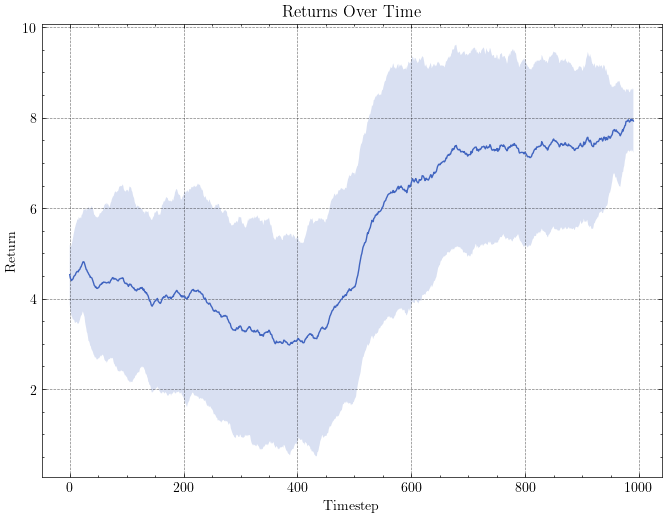

In [115]:
harness.plot_training_results(window=10)

In [125]:
trader = QTrader(args)
harness = QHarness(market, trader)
harness.train(10, 1000)
regrets.append(harness.regrets)

In [126]:
import numpy as np
cum_regs = np.cumsum(harness.regrets, axis=1)
mean = np.mean(cum_regs, axis=0)
std = np.std(cum_regs, axis=0)

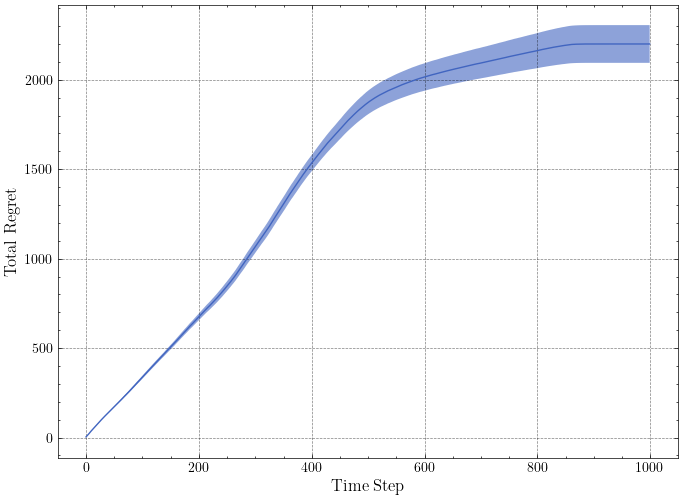

In [127]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(mean)
plt.fill_between(np.arange(mean.shape[0]), mean - 0.1*std, mean + 0.1*std, alpha=0.6)
plt.xlabel('Time Step', size=12)
plt.ylabel('Total Regret', size=12)
plt.savefig('dqn-2ii')

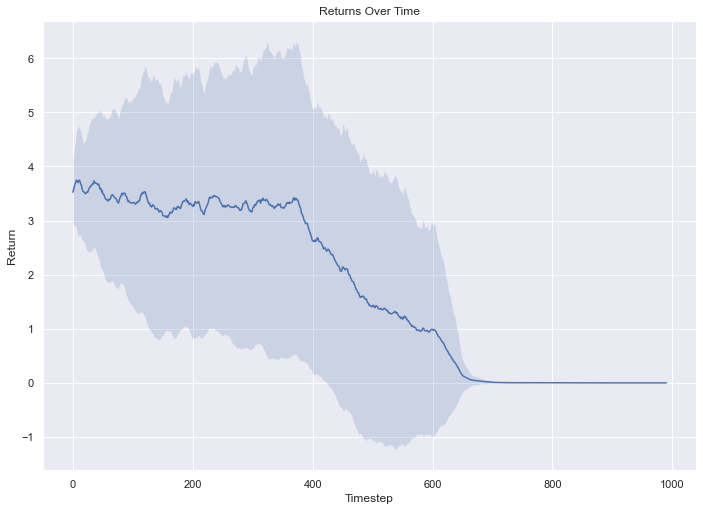

In [29]:
harness.plot_training_regret(window=10)

# 5 Assets

- Had to increase increment size in order for this to work

In [53]:
# create a generitive market that produces returns on two assets
μ = [1, 8, 5, 4, 2]
Σ = [[0.2, 0, 0, 0, 0], 
     [0, 0.4, 0, 0, 0], 
     [0, 0, 0.6, 0, 0],
     [0, 0, 0, 0.1, 0],
     [0, 0, 0, 0, 0.8]
    ]
market = GenerativeMarketEnv(μ, Σ)

In [54]:
args.num_assets = 5
args.increment = 0.25
args.lr = 0.005
trader = QTrader(args)
harness = QHarness(market, trader)
harness.train(4, 700)

In [57]:
cum_regs = np.cumsum(harness.regrets, axis=1)
mean = np.mean(cum_regs, axis=0)
std = np.std(cum_regs, axis=0)

Text(0, 0.5, 'Total Regret')

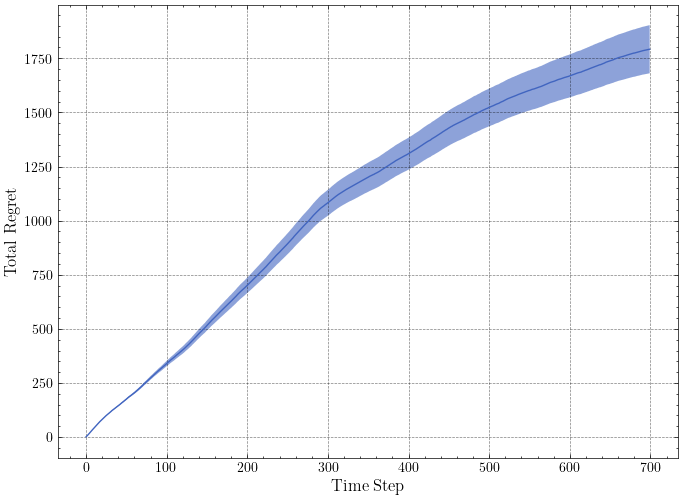

In [58]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(mean)
plt.fill_between(np.arange(mean.shape[0]), mean - 0.1*std, mean + 0.1*std, alpha=0.6)
plt.xlabel('Time Step', size=12)
plt.ylabel('Total Regret', size=12)

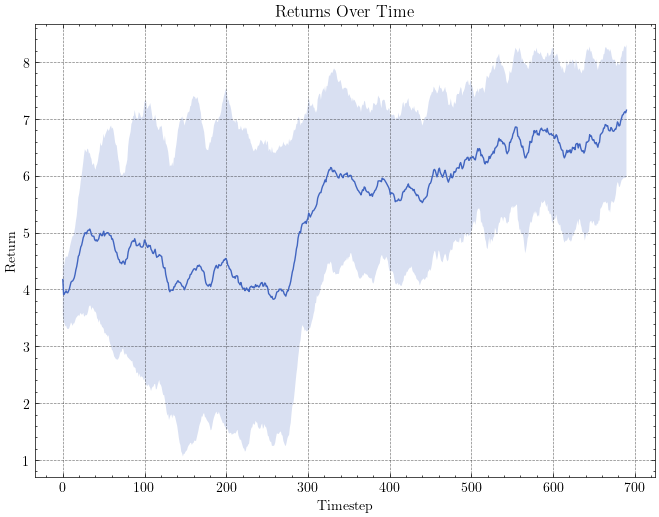

In [55]:
harness.plot_training_results(window=10)

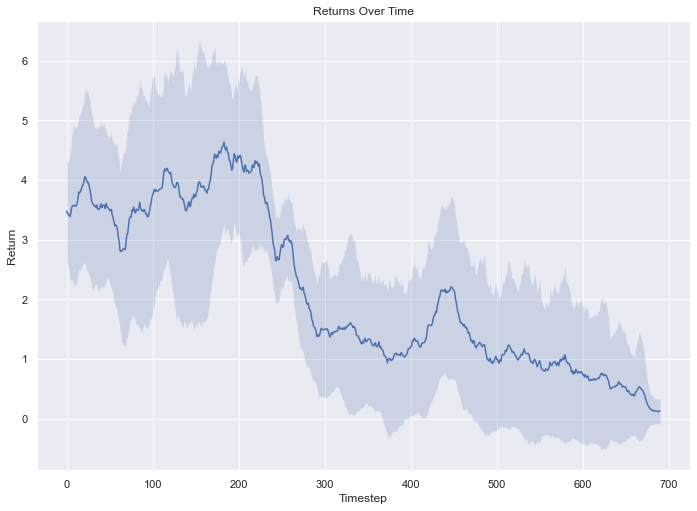

In [12]:
harness.plot_training_regret(window=10)

In [104]:
# create a generitive market that produces returns on two assets
μ = [1, 8, 8.5, 7.5, 0.4, 8.3, 7.9, 8.9, 4.1, 2.2]
Σ = [
    [0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.3, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0.7, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.7, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6]
    ]
market = GenerativeMarketEnv(μ, Σ)

In [108]:
args.num_assets = 10
args.increment = 0.4
args.lr = 0.045
trader = QTrader(args)
harness = QHarness(market, trader)
harness.train(4, 2000)

In [109]:
cum_regs = np.cumsum(harness.regrets, axis=1)
mean = np.mean(cum_regs, axis=0)
std = np.std(cum_regs, axis=0)

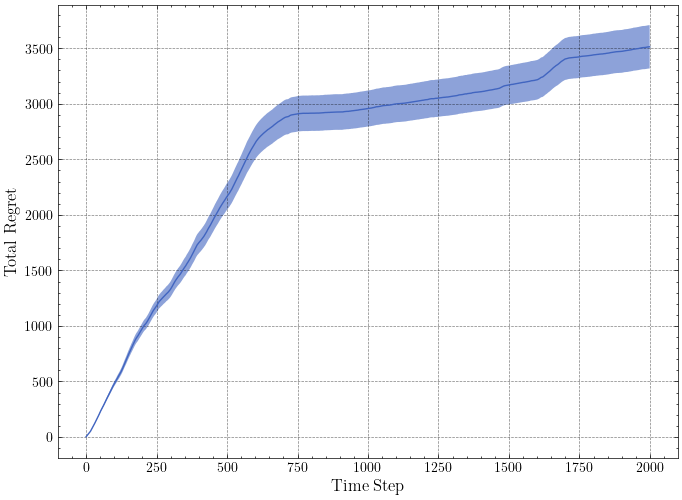

In [111]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(mean)
plt.fill_between(np.arange(mean.shape[0]), mean - 0.1*std, mean + 0.1*std, alpha=0.6)
plt.xlabel('Time Step', size=12)
plt.ylabel('Total Regret', size=12)
plt.savefig('dqn-10')

# 8 Assets: Real Data

In [64]:
import pandas as pd
import numpy as np
import random
from MarketFactory import MarketFactory

In [68]:
stocks = ['AAPL' ,'ADBE' ,'ADI' ,'ADP' ,'ADSK' ,'AEP' ,'ALGN' ,'ALXN' ,'AMAT' ,'AMD' ,'AMGN' ,'AMZN' ,'ANSS' ,'ASML' ,'ATVI'
 ,'AVGO' ,'BIDU' ,'BIIB' ,'BKNG' ,'CDNS' ,'CDW' ,'CERN' ,'CHKP' ,'CHTR' ,'CMCSA' ,'COST' ,'CPRT' ,'CSCO' ,'CSX' ,'CTAS'
 ,'CTSH' ,'DLTR' ,'DOCU' ,'DXCM' ,'EA' ,'EBAY' ,'EXC' ,'FAST' ,'FB' ,'FISV' ,'FOX' ,'FOXA' ,'GILD' ,'GOOG' ,'GOOGL'
 ,'IDXX' ,'ILMN' ,'INCY' ,'INTC' ,'INTU' ,'ISRG' ,'JD' ,'KDP' ,'KHC' ,'KLAC' ,'LRCX' ,'LULU' ,'MAR' ,'MCHP' ,'MDLZ'
 ,'MELI' ,'MNST' ,'MRNA' ,'MRVL' ,'MSFT' ,'MTCH' ,'MU' ,'MXIM' ,'NFLX' ,'NTES' ,'NVDA' ,'NXPI' ,'OKTA' ,'ORLY' ,'PAYX'
 ,'PCAR' ,'PDD' ,'PEP' ,'PTON' ,'PYPL' ,'QCOM' ,'REGN' ,'ROST' ,'SBUX' ,'SGEN' ,'SIRI' ,'SNPS' ,'SPLK' ,'SWKS' ,'TCOM'
 ,'TEAM' ,'TMUS' ,'TSLA' ,'TXN' ,'VRSK' ,'VRSN' ,'VRTX' ,'WBA' ,'WDAY' ,'XEL' ,'XLNX' ,'ZM']

random.shuffle(stocks)
sampled_stocks = stocks[:10]
factory = MarketFactory(sampled_stocks, "2020-01-01", "2021-04-30")
market = factory.create_market()

[*********************100%***********************]  10 of 10 completed


In [69]:
args = AgentArgs(
     num_assets = 2,
     increment = 0.5,
     ϵ_start=0.99,
     ϵ_end=0.1,
     ϵ_decay=0.99,
     q_network_hidden_size = 64,
     decay_start_time=50,
     start_ts = 500,
     γ=0.9,
     target_update='SOFT',
     buffer_size=1000,
     batch_size=64,
     lr=0.001,
     τ=0.01,
     evaluate=False,
     update_cadence=200,
     burn_in_period=50,
     dueling=True
 )

In [70]:
args.num_assets = 10
args.increment = 0.1
trader = QTrader(args)
harness = QHarness(market, trader)
harness.train(4, 1000)

In [73]:
cum_regs = np.cumsum(harness.regrets, axis=1)
mean = np.mean(cum_regs, axis=0)
std = np.std(cum_regs, axis=0)

Text(0, 0.5, 'Total Regret')

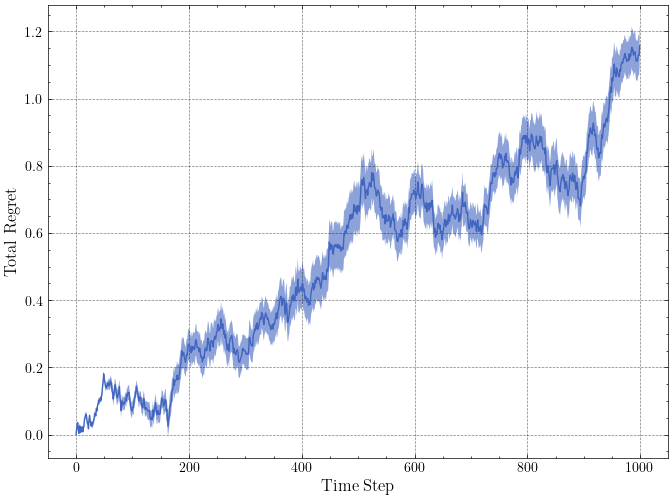

In [76]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(mean)
plt.fill_between(np.arange(mean.shape[0]), mean - 0.1*std, mean + 0.1*std, alpha=0.6)
plt.xlabel('Time Step', size=12)
plt.ylabel('Total Regret', size=12)

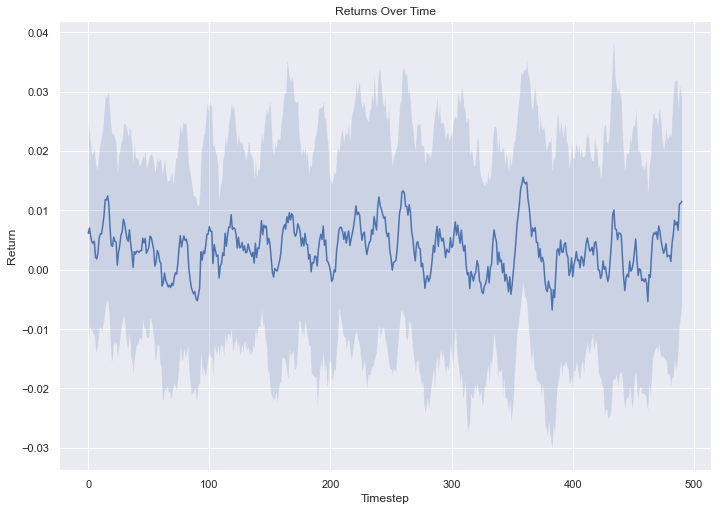

In [23]:
harness.plot_training_results(window=10)

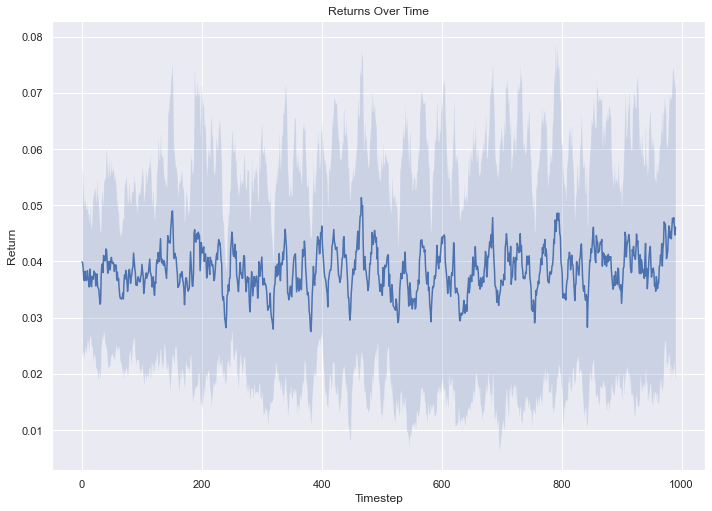

In [26]:
harness.plot_training_regret(window=10)